## Dataframes
Another important technique in programming languages is being able to create "composite" variables which
have several different parts to them. These are used to group things together. In very general case these are called "structures" or "classes" in Python (as well as in many other programming languages). 

Before we look at how to create general Classes and Structures, we will look at a specific example, Dataframe. Dataframes in Python are a particular example of a class/structure in Python. It is a very useful tool and it shows what can be dome with Classes, Structures and Functions that we will learn about. 

Here we use Dataframes together with Numpy arrays tomake some plots of sea-level versus time for different locations.

Dataframes are very like spread-sheets, but geared toward use in a program. 

In [50]:
import pandas
import matplotlib.pyplot as plt

In [103]:
# Lets create a really simple Dataframe
mydataset = { 'course number': [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ,
              'course name': ["CEE", "Mech E", "DMSE", "Arch", "Chem", "EECS", "Bio", "Phys", "BCS", "Chem E"]}

In [5]:
myDF=pandas.DataFrame(mydataset)

In [105]:
# Now we have a simple table
myDF

,course number,course name
0,1,CEE
1,2,Mech E
2,3,DMSE
3,4,Arch
4,5,Chem
5,6,EECS
6,7,Bio
7,8,Phys
8,9,BCS
9,10,Chem E


In [107]:
# We can lookup a course number!
myDF[myDF['course number']==10]

,course number,course name
9,10,Chem E


In [171]:
# Note we also used a Dictionary to intialize e.g.
print("Type of variable mydataset =", type(mydataset))
# The dictionary keys are
print("Dictionary keys ", mydataset.keys())

Type of variable mydataset = <class 'dict'>
Dictionary keys  dict_keys(['course number', 'course name'])


In [111]:
# As a "Class" the Dataframe package includes all sorts of nice featueres.
#
# For example it knows how to find and read HTML tables from a simple page. 
#
# Here is an example scraping some data related t tide-gauge data measuring sea-surface height. 
# Site -  https://www.psmsl.org maintains tide gauge data for sea-level for locations all around the world,
#         including Woods Hole.
#
# The site page "obtaining/" has a table that pandas can identify and read. 
#
# This table lists tide gauges all over the planet that measure the sea-
# 
sl_list = pandas.read_html("https://www.psmsl.org/data/obtaining/")[0]
sl_list

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,BREST,1,48.383,-4.495,242.0,FRA,06/05/2021,190,91
1,SWINOUJSCIE,2,53.917,14.233,NaN,POL,19/10/2001,110,92
2,SHEERNESS,3,51.446,0.743,NaN,GBR,09/03/2021,170,101
3,HOLYHEAD,5,53.314,-4.620,NaN,GBR,09/03/2021,170,191
4,CUXHAVEN 2,7,53.867,8.717,284.0,DEU,01/10/2019,140,12
...,...,...,...,...,...,...,...,...,...
1543,ST LAWRENCE,2354,46.917,-55.390,NaN,CAN,10/08/2021,970,113
1544,SUVA-B,2356,-18.133,178.428,NaN,FJI,03/02/2021,742,14
1545,SYDNEY PORT JACKSON,2358,-33.826,151.259,NaN,AUS,13/06/2019,680,138
1546,ARKO,2359,58.484,16.961,NaN,SWE,25/02/2021,50,112


In [115]:
# As a "Class" Pandas includes useful functions for its sorts of data.
# For example it includes code for searching its tables, which we can use to find
# data from Woods Hole.
swh=sl_list[sl_list['Station Name'].str.contains('WOODS')==True]
swh

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
249,WOODS HOLE (OCEAN. INST.),367,41.523,-70.672,NaN,USA,02/02/2021,960,165


http://www.psmsl.org/data/obtaining/rlr.monthly.data/367.rlrdata


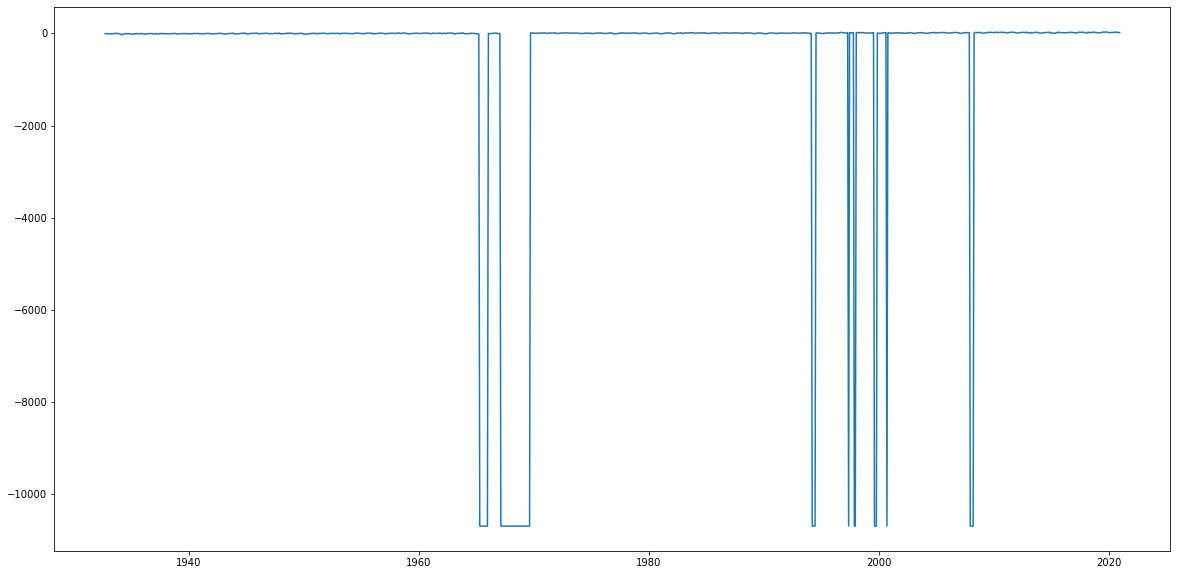

In [146]:
# We can the read the Woods Hole data and extract into a Numpy array
# and make a plot
# 1. construct station URL using ID field (per PSMSL documentation)
# 2. read data
# 3. convert table to an array of rows and columns
# 4. plot height v time
whurl="http://www.psmsl.org/data/obtaining/rlr.monthly.data/%d.rlrdata"%(swh['ID'])
print(whurl)
df = pandas.read_csv(whurl,delimiter=';')
npdat =df.to_numpy()
t=npdat[:,0];h=npdat[:,1]
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(t,(h-h[0])/10);

Min h = 6681.0


Text(0, 0.5, 'Tide Height (cm)')

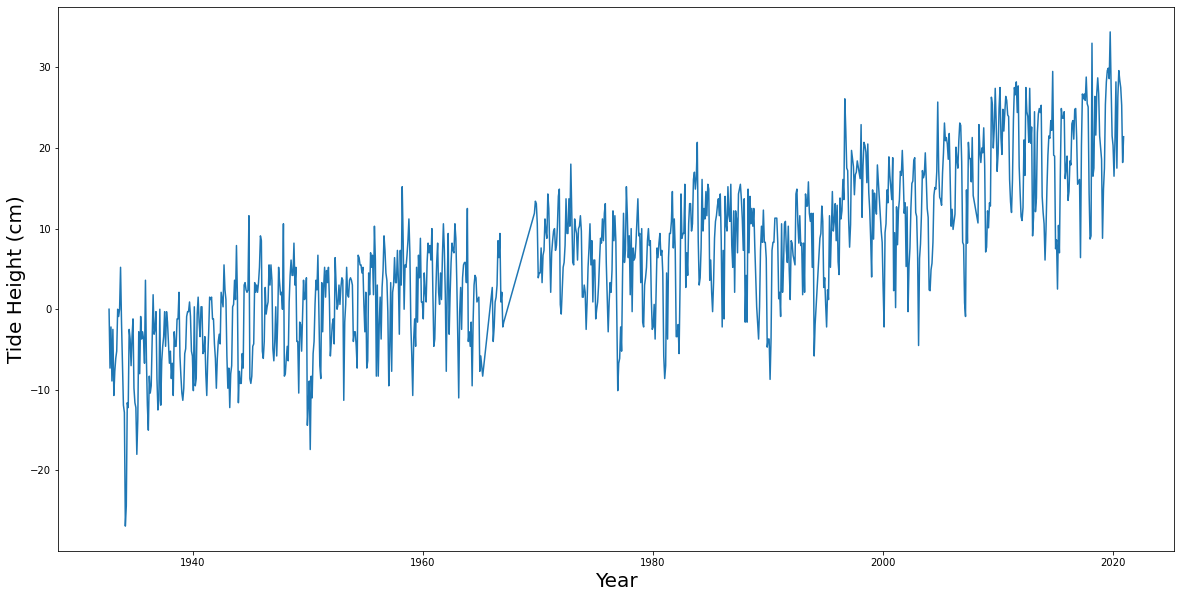

In [155]:
# Uh-oh, that looks weird!
# Check the minimum - it has a "bad-data" flag by the looks of it.
print("Min h =",h.min())
# Fix and try again
df = pandas.read_csv(whurl,delimiter=';')
df=df[df.iloc[:,1]>=-1000]
npdat =df.to_numpy()
t=npdat[:,0];h=npdat[:,1]
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(t,(h-h[0])/10);
plt.xlabel("Year",fontsize=20)
plt.ylabel("Tide Height (cm)",fontsize=20)
# Sea-level looks to have risen by about 30cm at the Woods Hole location over the last 100 years.

In [158]:
# Now lets look at another location - this time near Finland
sfi=sl_list[sl_list['Station Name'].str.contains('FOGLO')==True]
sfi
fiurl="http://www.psmsl.org/data/obtaining/rlr.monthly.data/%d.rlrdata"%(sfi['ID'])
print(fiurl)

http://www.psmsl.org/data/obtaining/rlr.monthly.data/249.rlrdata


In [159]:
df = pandas.read_csv(fiurl,delimiter=';')
df=df[df.iloc[:,1]>=-1000]

In [160]:
npdat =df.to_numpy()

In [161]:
t=npdat[:,0];h=npdat[:,1]

Text(0, 0.5, 'Tide Height (cm)')

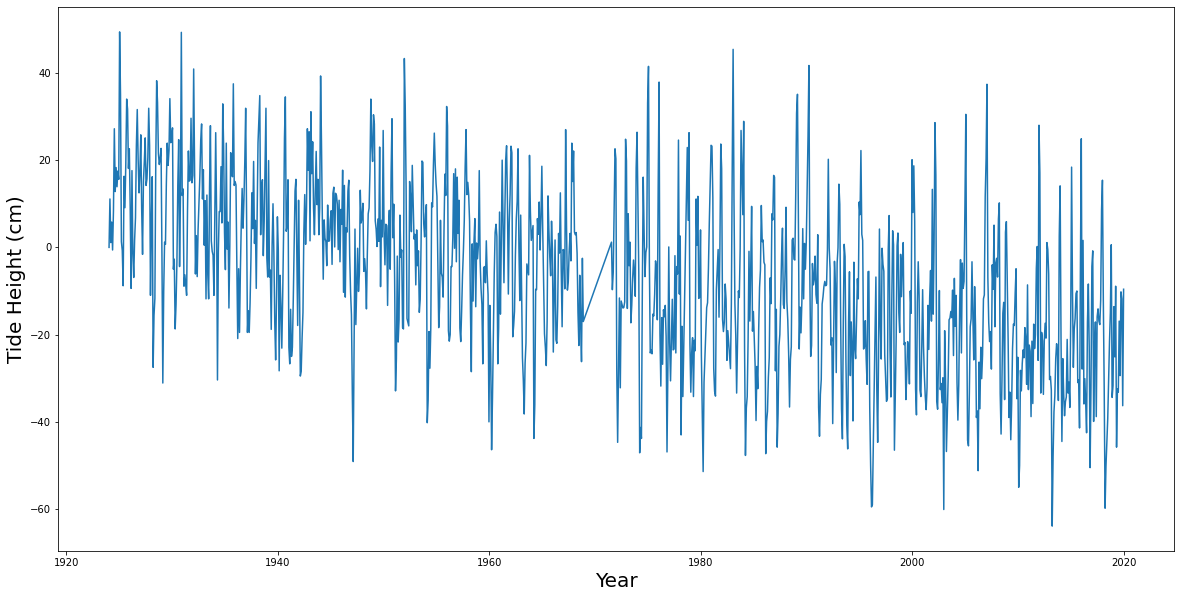

In [164]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(t,(h-h[0])/10)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Tide Height (cm)",fontsize=20)

In [165]:
# Any thoughts why the series near Finland appears to go down by ~20cm over 100 years!